## **Phase 1 Exploratory Analysis: Water Usage**

In this section, I am exploring the following:

* How much water is used for the following per county:
    - Agriculture
    - Residential outdoor use (secondary)
    - Residential indoor use (primary)
    - Commercial potable use
    - Institutional potable use
    - Industrial potable use


TO DO:
*  make palette accessibility-friendly
*  add map with counties and shown population

In [1]:
print("You can see me") #but not me

You can see me


In [1]:
# Set constant variables
color1 = '#9BC6AF' #pale green
color2 = '#B02D3A' #dark peach
color3 = '#CB7969' #peach

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import Municipality and Industrial data for each year per county or state-wide
def import_data(region, year):
    df = pd.read_csv("./data/" + year + "_MI_" + region + ".csv")
    return df

In [4]:
# Import state-wide data
state_MI_2015 = import_data("state", "2015")
state_MI_2016 = import_data("state", "2016")
state_MI_2017 = import_data("state", "2017")
state_MI_2018 = import_data("state", "2018")
state_MI_2019 = import_data("state", "2019")

# Import county-wide data
county_MI_2015 = import_data("county", "2015")
county_MI_2016 = import_data("county", "2016")
county_MI_2017 = import_data("county", "2017")
county_MI_2018 = import_data("county", "2018")
county_MI_2019 = import_data("county", "2019")

First let's merge state-wide data from each year to one dataframe. 

    

In [5]:
# Merge all state data to one dataframe
df_state = pd.concat([state_MI_2015, state_MI_2016, state_MI_2017, state_MI_2018, state_MI_2019])

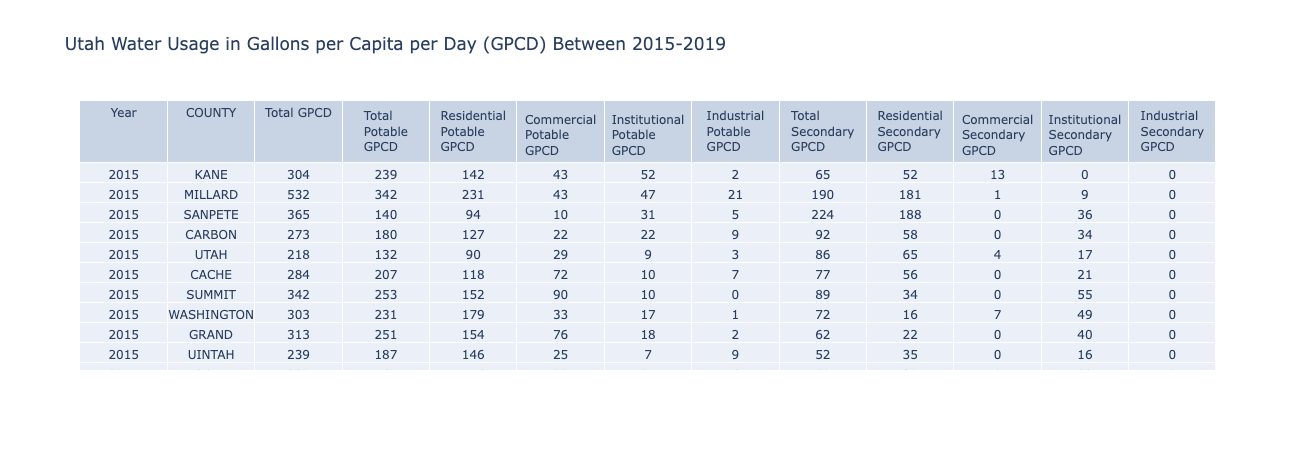

In [7]:
def format_table(df, title):
    
    import plotly.graph_objects as go

    if 'NAME' in df.columns:
        name = 'NAME'
        new_name = 'COUNTY'
    elif 'STATE' in df.columns:
        name = 'STATE'
        new_name = 'STATE'
        
    df_table = df[['Year', 
                   name,
                   'TotalGPCD', 
                   'TotPotGPCD', 
                   'ResPotGPCD', 
                   'ComPotGPCD',
                   'InsPotGPCD',
                   'IndPotGPCD',
                   'TotSecGPCD',
                   'ResSecGPCD',
                   'ComSecGPCD',
                   'InsSecGPCD',
                   'IndSecGPCD'
                  ]].rename(columns={'TotalGPCD':'Total GPCD',
                                     name:new_name,
                                     'TotPotGPCD':'Total Potable GPCD',
                                     'ResPotGPCD':'Residential Potable GPCD',
                                     'ComPotGPCD':'Commercial Potable GPCD',
                                     'InsPotGPCD':'Institutional Potable GPCD',
                                     'IndPotGPCD':'Industrial Potable GPCD',
                                     'TotSecGPCD':'Total Secondary GPCD',
                                     'ResSecGPCD':'Residential Secondary GPCD',
                                     'ComSecGPCD':'Commercial Secondary GPCD',
                                     'InsSecGPCD':'Institutional Secondary GPCD',
                                     'IndSecGPCD':'Industrial Secondary GPCD',

        })

    fig = go.Figure(data=[go.Table(
#         columnwidth=colwidth,
        header=dict(values=list(df_table.columns),
                    align='center'),
        cells=dict(values=df_table.transpose(),
                   align='center'))
    ])

    fig.update_layout(
        title=title,
    )

    return fig.show()

format_table(county_MI_2015, title="Utah Water Usage in Gallons per Capita per Day (GPCD) Between 2015-2019")

### How has water usage across the state changed between 2015-2019? How much water usage can be accounted for by potable (treated) versus secondary (untreated) use?

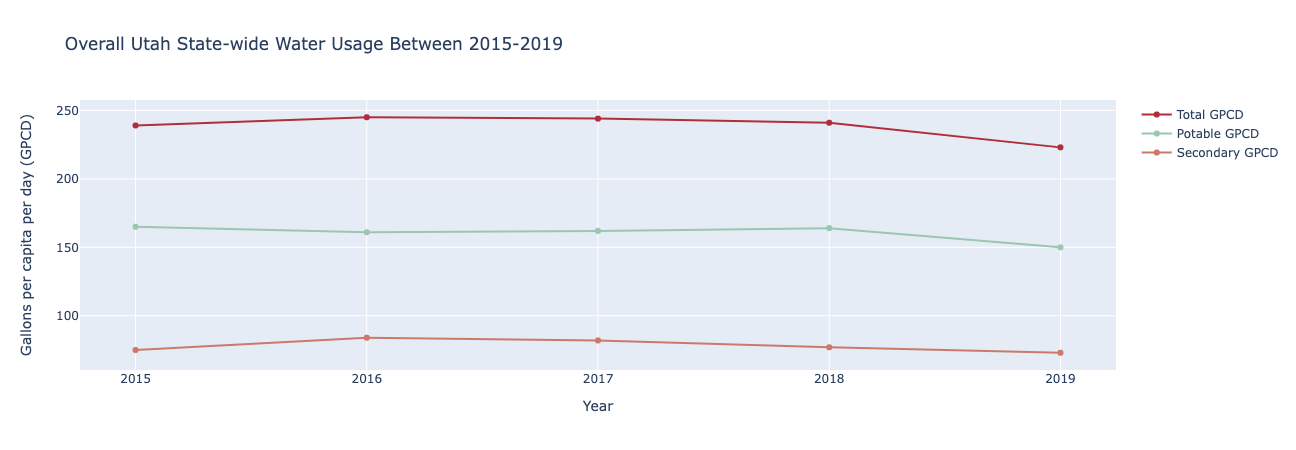

In [139]:


import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Total GPCD",
    x=df_state['Year'], 
    y=df_state['TotalGPCD'], 
#     fill='tozeroy',
    text='Total GPCD',
    marker=dict(color=color2)
)) 

fig.add_trace(go.Scatter(
    name="Potable GPCD",
    x=df_state['Year'], 
    y=df_state['TotPotGPCD'],
#     fill='tozeroy',
    text='Potable GPCD',
    marker=dict(color=color1)
)) 

fig.add_trace(go.Scatter(
    name="Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['TotSecGPCD'],
#     fill='tozeroy',
    text='Secondary GPCD',
    marker=dict(color=color3)
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Overall Utah State-wide Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

Between 2015 and 2019, water usage across the state seems to have remained steady over the years, with total GPCD remaining a little under 250 GPCD. Around 64% of that can be attributed to potable use, and the remaining attributed to secondary use. 

### How is state-wide water usage being distributed between residential, industrial, institutional, and commercial properties?

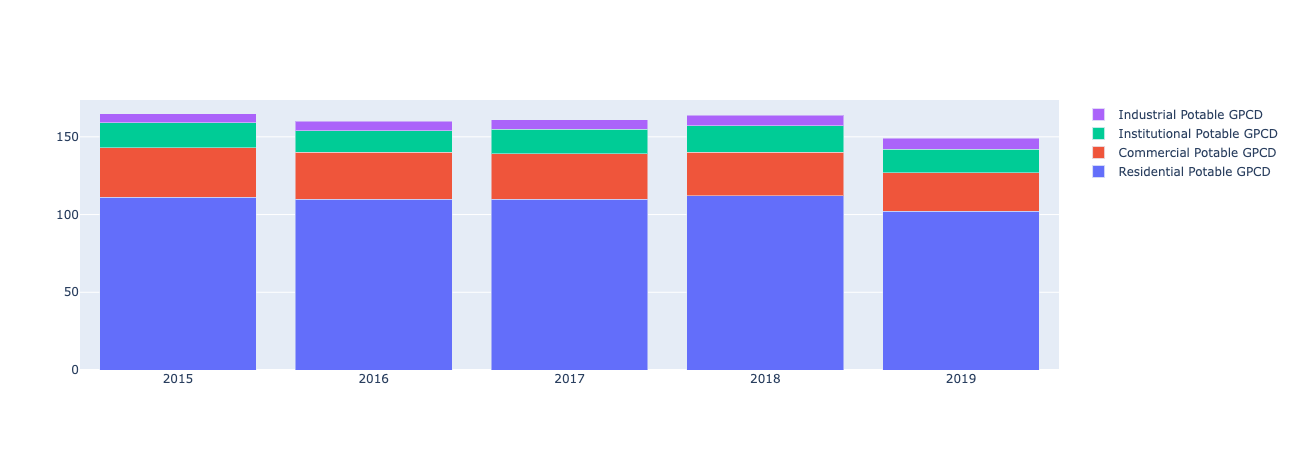

In [124]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    name="Residential Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ResPotGPCD'],
    text='Residential Potable GPCD'
)) 
fig.add_trace(go.Bar(
    name="Commercial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ComPotGPCD'],
    text='Commercial Potable GPCD'
)) 
fig.add_trace(go.Bar(
    name="Institutional Potable GPCD",
    x=df_state['Year'], 
    y=df_state['InsPotGPCD'],
    text='Institutional Potable GPCD'
)) 
fig.add_trace(go.Bar(
    name="Industrial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['IndPotGPCD'],
    text='Industrial Potable GPCD'
)) 

fig.update_layout(
    barmode='stack'
)
fig.show()

# pdd = pd.DataFrame(df_state.describe())
# pdd['mean']
# print(Series(df_state.describe().columns).transpose())
# pd.DataFrame({'mean':df_state.describe().loc['mean'], 'd':np.array([df_state.describe().columns])})

In [2]:

df_state_means = pd.DataFrame(df_state.describe().loc['mean']).transpose()

sum_pot = float(df_state_means['ResPotGPCD'] + df_state_means['ComPotGPCD'] + df_state_means['InsPotGPCD'] + df_state_means['IndPotGPCD'])
sum_sec = float(df_state_means['ResSecGPCD'] + df_state_means['ComSecGPCD'] + df_state_means['InsSecGPCD'] + df_state_means['IndSecGPCD'])

df_state_means = df_state_means.assign(Perc_ResPotGPCD = float((df_state_means['ResPotGPCD'] / sum_pot) * 100))
df_state_means = df_state_means.assign(Perc_ComPotGPCD = float(df_state_means['ComPotGPCD'] / sum_pot) * 100)
df_state_means = df_state_means.assign(Perc_InsPotGPCD = float(df_state_means['InsPotGPCD'] / sum_pot) * 100)
df_state_means = df_state_means.assign(Perc_IndPotGPCD = float(df_state_means['IndPotGPCD'] / sum_pot) * 100)
df_state_means = df_state_means.assign(Perc_ResSecGPCD = float(df_state_means['ResSecGPCD'] / sum_sec) * 100)
df_state_means = df_state_means.assign(Perc_ComSecGPCD = float(df_state_means['ComSecGPCD'] / sum_sec) * 100)
df_state_means = df_state_means.assign(Perc_InsSecGPCD = float(df_state_means['InsSecGPCD'] / sum_sec) * 100)
df_state_means = df_state_means.assign(Perc_IndSecGPCD = float(df_state_means['IndSecGPCD'] / sum_sec) * 100)
df_state_means


NameError: name 'pd' is not defined

In [130]:
def plot_avg_by_type(df_mean, title):
    
    import plotly.express as px

    df_means_t = df_mean.transpose().iloc[33:]
    df_means_t = df_means_t.assign(pot_or_sec = ['Potable','Potable','Potable','Potable','Secondary','Secondary', 'Secondary', 'Secondary'])
    df_means_t = df_means_t.assign(property_type = ['Residential', 'Commercial', 'Institutional', 'Industrial', 'Residential', 'Commercial', 'Institutional', 'Industrial'])

    fig = px.bar(df_means_t, 
                 x="mean", 
                 y="pot_or_sec", 
                 color="property_type", 
                 title="Wide-Form Input",
                 orientation='h')
    # Add axis labels, title, etc.
    fig.update_layout(
        title=title,
        xaxis_title="Average % of GPCD Water Usage",
        yaxis_title="Type of Water Usage",
        legend_title="Property Type"
    )
    
    return fig.show()


In [131]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=df_state_new['pot_or_sec'], 
    y=df_state_new['mean'], 
    color=df_state_new['property_type'],
    name='Potable GPCD'
))

# fig.add_trace(go.Bar(
#     x=county_MI_2015['pot_or_sec'], 
#     y=county_MI_2015['TotSecGPCD'], 
#     name='Secondary GPCD'
# ))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)
fig.show()

KeyError: 'pot_or_sec'

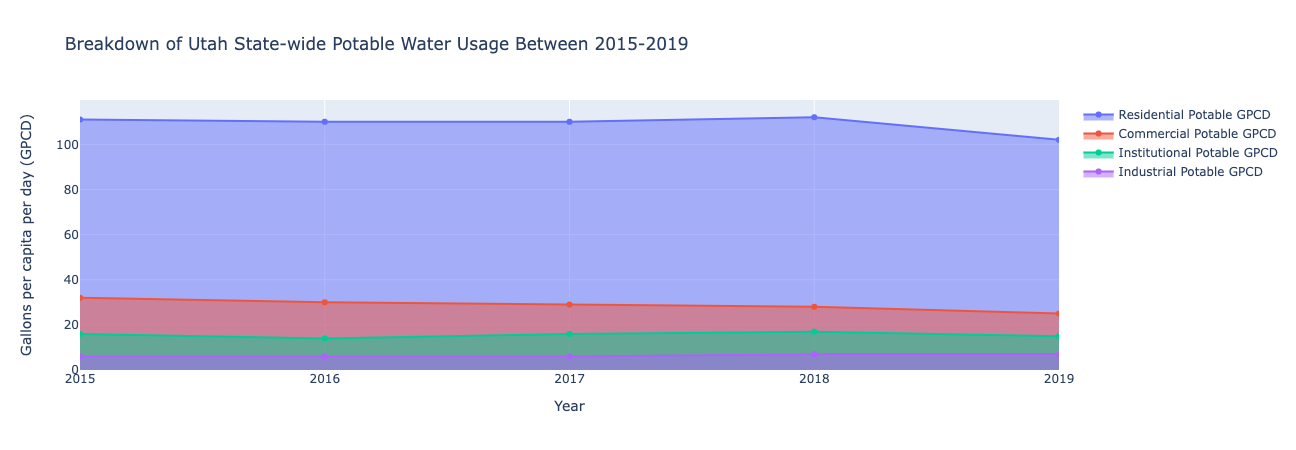

In [132]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ResPotGPCD'],
    fill='tozeroy',
    text='Residential Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['ComPotGPCD'],
    fill='tozeroy',
    text='Commercial Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Potable GPCD",
    x=df_state['Year'], 
    y=df_state['InsPotGPCD'],
    fill='tozeroy',
    text='Institutional Potable GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Potable GPCD",
    x=df_state['Year'], 
    y=df_state['IndPotGPCD'],
    fill='tozeroy',
    text='Industrial Potable GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Potable Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

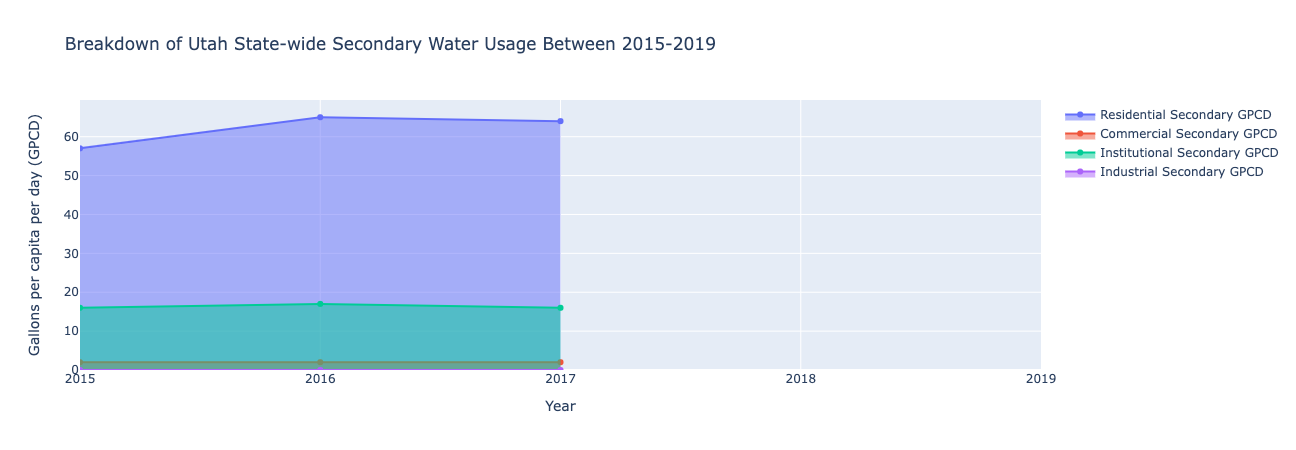

In [133]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Residential Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ResSecGPCD'],
    fill='tozeroy',
    text='Residential Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Commercial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['ComSecGPCD'],
    fill='tozeroy',
    text='Commercial Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Institutional Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['InsSecGPCD'],
    fill='tozeroy',
    text='Institutional Secondary GPCD'
)) 
fig.add_trace(go.Scatter(
    name="Industrial Secondary GPCD",
    x=df_state['Year'], 
    y=df_state['IndSecGPCD'],
    fill='tozeroy',
    text='Industrial Secondary GPCD'
)) 

# Add axis labels, title, etc.
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df_state['Year'],
        ticktext = df_state['Year']
    ),
    title="Breakdown of Utah State-wide Secondary Water Usage Between 2015-2019",
    xaxis_title="Year",
    yaxis_title="Gallons per capita per day (GPCD)",
)

fig.show()

Secondary state-wide water usage is unavailable in 2018 and 2019 unfortunately --> investigate why!

### Water Usage by County

In [134]:
county_MI_2015

OBJECTID  COUNTYNBR        NAME  TotalGPCD  TotPotGPCD  ResPotGPCD  \
0          1         13        KANE        304         239         142   
1          2         14     MILLARD        532         342         231   
2          3         20     SANPETE        365         140          94   
3          4          4      CARBON        273         180         127   
4          5         25        UTAH        218         132          90   
5          6          3       CACHE        284         207         118   
6          7         22      SUMMIT        342         253         152   
7          8         27  WASHINGTON        303         231         179   
8          9         10       GRAND        313         251         154   
9         10         24      UINTAH        239         187         146   
10        11         23      TOOELE        228         167         116   
11        12         21      SEVIER        360         247         141   
12        13          9    GARFIELD        626         292         167   
13        14         19    SAN JUAN        199         143         113   
14        15          2   BOX ELDER        320         238         178   
15        16         11        IRON        223         175         126   
16        17         29       WEBER        256         112          69   
17        18          8       EMERY        577         136         112   
18        19         17        RICH       1240        1028         896   
19        20         26     WASATCH        335         190         152   
20        21          1      BEAVER        552         232         138   
21        22          5     DAGGETT        634         390         238   
22        23          6       DAVIS        235         107          76   
23        24         28       WAYNE        575         253         179   
24        25         16       PIUTE        395         308         185   
25        26         15      MORGAN        242         111          94   
26        27         12        JUAB        364         237         158   
27        28         18   SALT LAKE        206         181         119   
28        29          7    DUCHESNE        314         205         124   

    ComPotGPCD  InsPotGPCD  IndPotGPCD  TotSecGPCD  ...  InsSecoUse  \
0           43          52           2          65  ...        3.63   
1           43          47          21         190  ...      101.51   
2           10          31           5         224  ...     1038.00   
3           22          22           9          92  ...      795.54   
4           29           9           3          86  ...    10650.10   
5           72          10           7          77  ...     2726.05   
6           90          10           0          89  ...     2240.90   
7           33          17           1          72  ...     8450.14   
8           76          18           2          62  ...      408.90   
9           25           7           9          52  ...      658.70   
10          22          24           6          60  ...     1465.36   
11          27          65          15         114  ...      840.60   
12          85          37           3         334  ...      110.30   
13          27           3           0          56  ...      156.10   
14          19           8          34          82  ...     1488.70   
15          31          16           2          47  ...      566.40   
16          23           7          12         145  ...     3841.44   
17          14           6           4         441  ...      718.27   
18         104          28           0         211  ...        8.60   
19          33           5           0         145  ...        0.00   
20          53          11          31         320  ...      580.90   
21         109          41           2         244  ...       85.00   
22          19           9           3         129  ...     7776.97   
23          41          26           6         322  ...      133.69   
24      

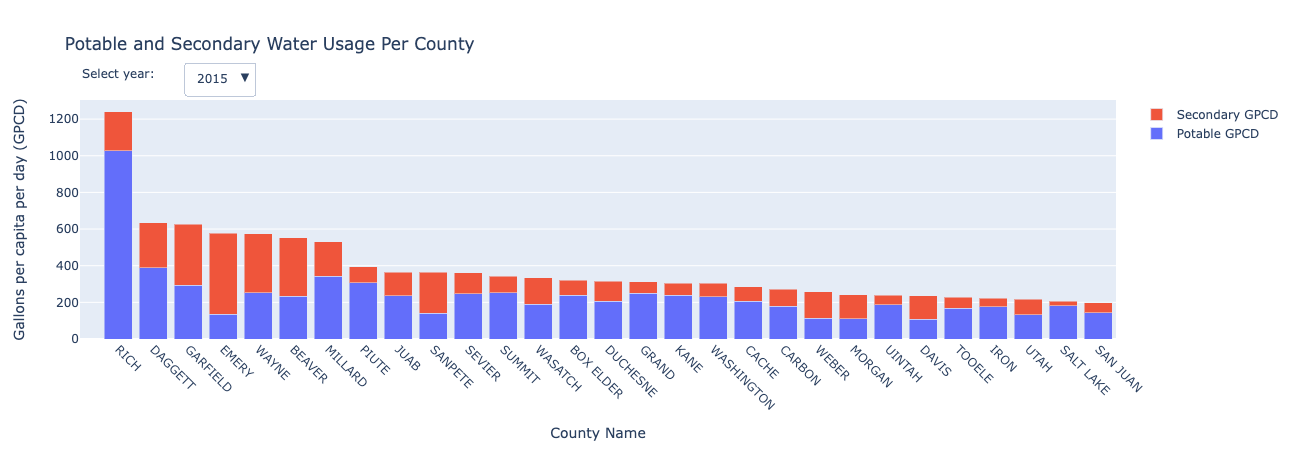

In [135]:
# highlight Salt Lake County
# add total GPCD state-wide (is this a mean, median, sum??)
# color / label the counties that meter secondary water

# import plotly.express as px


# fig = px.bar(county_MI_2015, x='NAME', y='TotSecGPCD', height=400)

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotPotGPCD'], 
    name='Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotSecGPCD'], 
    name='Secondary GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'],county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotPotGPCD'],county_MI_2015['TotSecGPCD']]}],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'],county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotPotGPCD'],county_MI_2016['TotSecGPCD']]}],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'],county_MI_2017['NAME']],
                        'y':[county_MI_2017['TotPotGPCD'],county_MI_2017['TotSecGPCD']]}],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'],county_MI_2018['NAME']],
                        'y':[county_MI_2018['TotPotGPCD'],county_MI_2018['TotSecGPCD']]}],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'],county_MI_2019['NAME']],
                        'y':[county_MI_2019['TotPotGPCD'],county_MI_2019['TotSecGPCD']]}],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

In [136]:
# need to add new columns to original dataframe
# required additional data cleaning since 2018 and 2019 were missing secondary type columns (only provide total secondary GPCD)
def add_stat_columns(df_county, df_state, color_true=color3, color_false=color1):
    
    import numpy as np
    df_county = df_county.assign(Utah_TotalGPCD = df_state['TotalGPCD'][0])
    df_county = df_county.assign(Mean_TotalGPCD = df_county['TotalGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotalGPCD = df_county['TotalGPCD'].describe()['50%'])
    
    df_county = df_county.assign(Utah_TotPotGPCD = df_state['TotPotGPCD'][0])
    df_county = df_county.assign(Mean_TotPotGPCD = df_county['TotPotGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotPotGPCD = df_county['TotPotGPCD'].describe()['50%'])
    
    df_county = df_county.assign(Utah_TotSecGPCD = df_state['TotSecGPCD'][0])
    df_county = df_county.assign(Mean_TotSecGPCD = df_county['TotSecGPCD'].describe()['mean'])
    df_county = df_county.assign(Median_TotSecGPCD = df_county['TotSecGPCD'].describe()['50%'])
    
    df_county = df_county.assign(Mean_ResPotGPCD = df_county['ResPotGPCD'].describe()['mean'])
    df_county = df_county.assign(Mean_ComPotGPCD = df_county['ComPotGPCD'].describe()['mean'])
    df_county = df_county.assign(Mean_InsPotGPCD = df_county['InsPotGPCD'].describe()['mean'])
    df_county = df_county.assign(Mean_IndPotGPCD = df_county['IndPotGPCD'].describe()['mean'])

    if 'ResSecGPCD' in df_county.columns:
        df_county = df_county.assign(Mean_ResSecGPCD = df_county['ResSecGPCD'].describe()['mean'])
    if 'ComSecGPCD' in df_county.columns:
        df_county = df_county.assign(Mean_ComSecGPCD = df_county['ComSecGPCD'].describe()['mean'])
    if 'InsSecGPCD' in df_county.columns:
        df_county = df_county.assign(Mean_InsSecGPCD = df_county['InsSecGPCD'].describe()['mean'])
    if 'IndSecGPCD' in df_county.columns:
        df_county = df_county.assign(Mean_IndSecGPCD = df_county['IndSecGPCD'].describe()['mean'])
    
    df_county = df_county.assign(color = np.where(df_county['NAME'] == 'SALT LAKE', color_true, color_false))
    return df_county

county_MI_2015 = add_stat_columns(county_MI_2015, state_MI_2015)
county_MI_2016 = add_stat_columns(county_MI_2016, state_MI_2016)
county_MI_2017 = add_stat_columns(county_MI_2017, state_MI_2017)
county_MI_2018 = add_stat_columns(county_MI_2018, state_MI_2018)
county_MI_2019 = add_stat_columns(county_MI_2019, state_MI_2019)


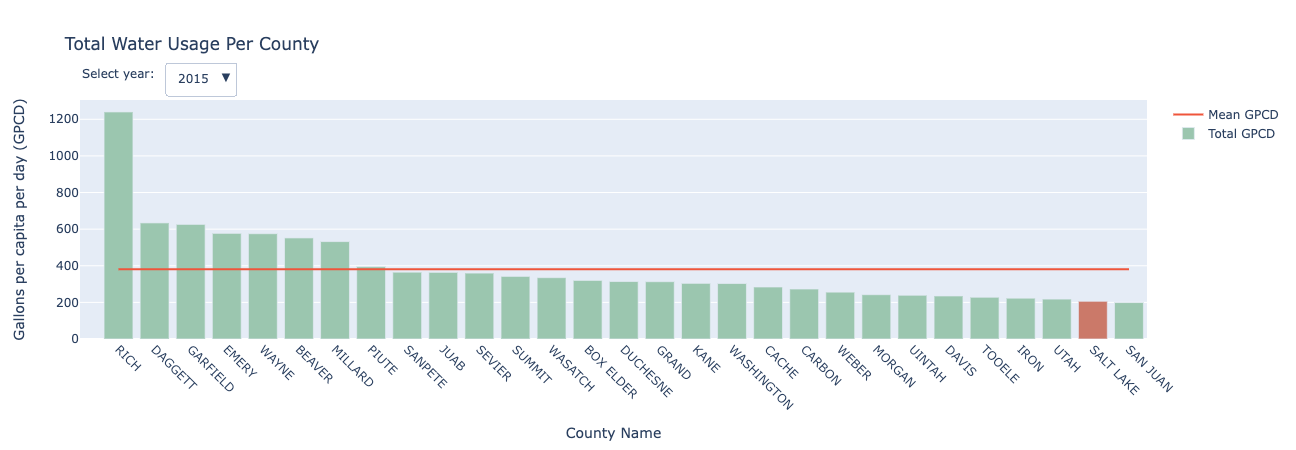

In [137]:
# highlight Salt Lake County
# add total GPCD state-wide (is this a mean, median, sum??)
# color / label the counties that meter secondary water

# import plotly.express as px
 # TO DO:
    # functionalize
    # decide on mean, median or utah reference line

import plotly.graph_objects as go

ref_var = 'Mean_TotalGPCD'
ref_var_txt = 'Mean GPCD'

fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotalGPCD'], 
    name='Total GPCD',
    marker=dict(color = county_MI_2015['color'])
))

fig.add_trace(go.Scatter(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015[ref_var], 
    name=ref_var_txt,
    marker=dict(color = county_MI_2015['color'])

))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Total Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotalGPCD'], county_MI_2015[ref_var]],
                        'marker':dict(color = county_MI_2015['color'])
                    }],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotalGPCD'], county_MI_2016[ref_var]],
                        'marker':dict(color = county_MI_2016['color'])
                    }],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'], county_MI_2017['NAME']],
                        'y':[county_MI_2017['TotalGPCD'], county_MI_2017[ref_var]],
                        'marker':dict(color = county_MI_2017['color'])
                    }],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'], county_MI_2018['NAME']],
                        'y':[county_MI_2018['TotalGPCD'], county_MI_2018[ref_var]],
                        'marker':dict(color = county_MI_2018['color'])
                    }],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'], county_MI_2019['NAME']],
                        'y':[county_MI_2019['TotalGPCD'], county_MI_2019[ref_var]],
                        'marker':dict(color = county_MI_2019['color'])
                    }],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.08,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

In [254]:
# Plot bar chart of Total, Potable or Secondary Water Usage in GPCD per county (select year)
def GPCD_per_county_barchart(title, bar_var, bar_var_txt, ref_var, ref_var_txt):
    
    import plotly.graph_objects as go

    fig = go.Figure(go.Bar(
        x=county_MI_2015['NAME'], 
        y=county_MI_2015[bar_var], 
        name=bar_var_txt,
        marker=dict(color = county_MI_2015['color'])
    ))

    fig.add_trace(go.Scatter(
        x=county_MI_2015['NAME'], 
        y=county_MI_2015[ref_var], 
        name=ref_var_txt,
        marker=dict(color = county_MI_2015['color'])

    ))

    # Add axis labels, title, etc.
    fig.update_layout(
        barmode='stack', 
        xaxis={'categoryorder':'total descending', 'tickangle':45},
        title=title,
        xaxis_title="County Name",
        yaxis_title="Gallons per capita per day (GPCD)",
    )

    # Add dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=[{
                            'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                            'y':[county_MI_2015[bar_var], county_MI_2015[ref_var]],
                            'marker':dict(color = county_MI_2015['color'])
                        }],
                        label="2015",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                            'y':[county_MI_2016[bar_var], county_MI_2016[ref_var]],
                            'marker':dict(color = county_MI_2016['color'])
                        }],
                        label="2016",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2017['NAME'], county_MI_2017['NAME']],
                            'y':[county_MI_2017[bar_var], county_MI_2017[ref_var]],
                            'marker':dict(color = county_MI_2017['color'])
                        }],
                        label="2017",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2018['NAME'], county_MI_2018['NAME']],
                            'y':[county_MI_2018[bar_var], county_MI_2018[ref_var]],
                            'marker':dict(color = county_MI_2018['color'])
                        }],
                        label="2018",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[county_MI_2019['NAME'], county_MI_2019['NAME']],
                            'y':[county_MI_2019[bar_var], county_MI_2019[ref_var]],
                            'marker':dict(color = county_MI_2019['color'])
                        }],
                        label="2019",
                        method="restyle"
                    )
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.2,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
    fig.update_layout(
        annotations=[
            dict(text="Select year:", showarrow=False,
            x=0, y=1.15, yref="paper", align="left")
        ]
    )

    return fig.show()

### **Water Usage Per County Per Year**

Looking at total water usage in gallons per capita per day, Rich County is consistently in the Top 3 counties. On the contrary, Salt Lake County, highlighted in the bar charts, is consistently in the bottom 3 counties. Why is most densely populated county using the lowest amount of water? Part of this may be because it is one of the only counties in the state where secondary (untreated) water is metered, so residents are more stringent with their landscaping water use. Another may be that due to the more dense population, there is less land to landscape, and therefore less to water. 

A few other factors: 
* agriculture is higher in some of the counties with water usage above the average
* the northern counties use more water and may also get more precipitation, so can maintain landscaped lawns
* southern counties 


A few trends are evident from total water usage charted per county each year. First, Rich County is consistently in the Top 3 counties with the highest total water usage in gallons per capita per day. This county is in the northeastern-most tip of Utah, where the weather is consistenly colder and more precipitous than other counties in Utah (show this data and compare to the average). 

On the contrary, Salt Lake County is the most densely populated county, and consistently in the Bottom 3 counties with total water usage in GPCD. More high density population may be one reason for this, with less lawn space and less agriculture (this can be investigated by looking at the secondary water usage below). 

Factors to investigate:
* landscaping data - what percentage of lawns are landscaped, what is the avg plot of land size for residents, etc.
* temperature and precipitation data
* policies around metering
* presence of local Master Gardeners?
* agriculture - was not included for residential secondary water use
* population density
* existance of many vacation homes - is not counted in population counts so GPCD may be particularly high if pop doesn't count but there water usage does (prevalent in Washington, Rich and Summit County - as provided by 2015 report)
    - Washington County has St. George - saw > 15% increase in average water use per capita from vacation home use

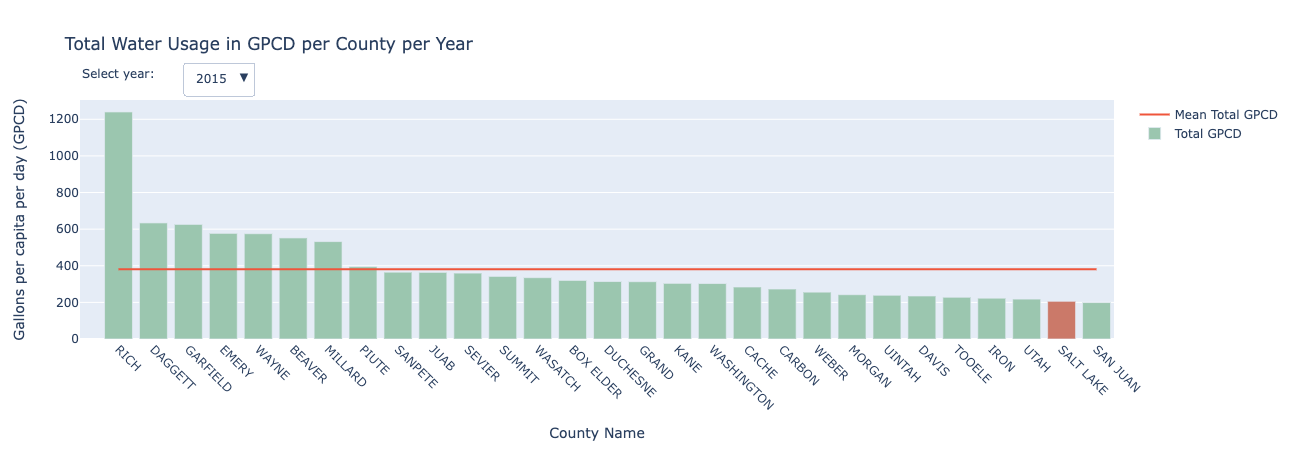

In [256]:
GPCD_per_county_barchart(title='Total Water Usage in GPCD per County per Year', 
                         bar_var='TotalGPCD', 
                         bar_var_txt='Total GPCD', 
                         ref_var='Mean_TotalGPCD', 
                         ref_var_txt='Mean Total GPCD')

When we break it down into Potable vs Secondary water usage, Rich County's high water usage seems to primarily due to their higher than average potable (treated/indoor) water usage. So why does Rich County use so much water? Is this primarily due to residential water use? Or is there a large presence of commercial, institutional, and/or industrial sites that require lots of treated water? Or are there fewer policies around water consumption?

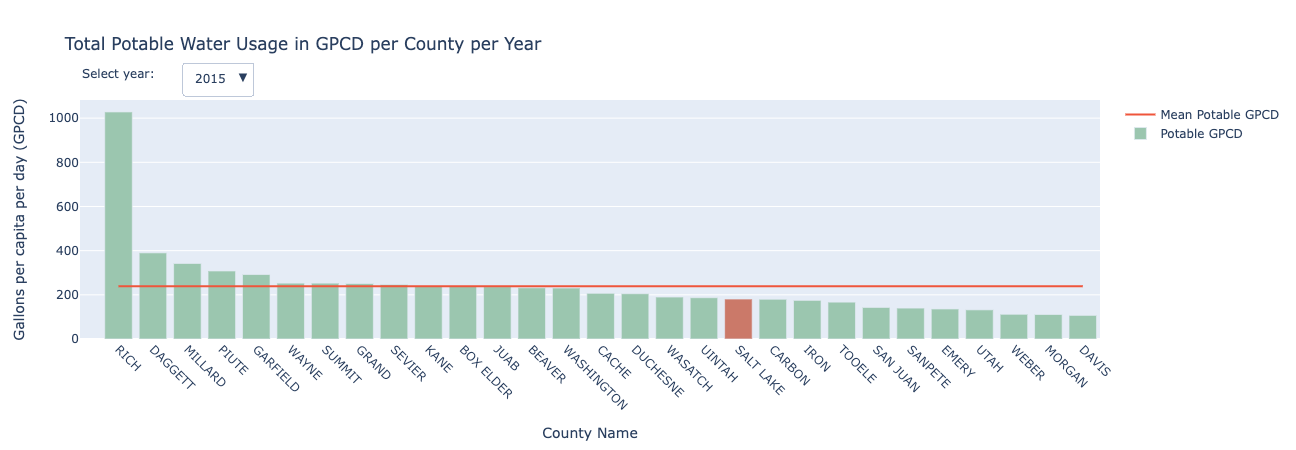

In [257]:
GPCD_per_county_barchart(title='Total Potable Water Usage in GPCD per County per Year', 
                         bar_var='TotPotGPCD', 
                         bar_var_txt='Potable GPCD', 
                         ref_var='Mean_TotPotGPCD', 
                         ref_var_txt='Mean Potable GPCD')

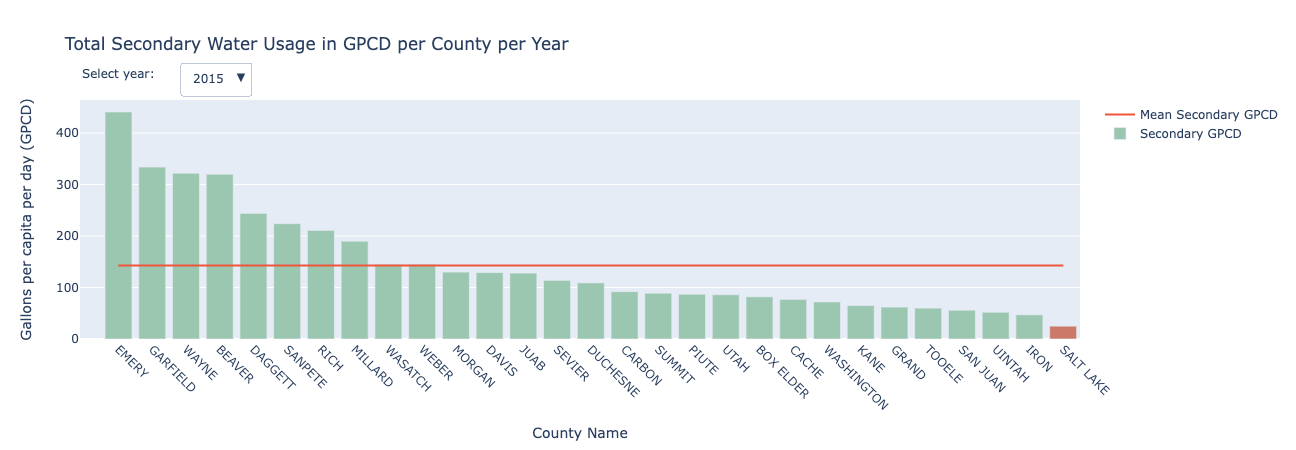

In [258]:
GPCD_per_county_barchart(title='Total Secondary Water Usage in GPCD per County per Year', 
                         bar_var='TotSecGPCD', 
                         bar_var_txt='Secondary GPCD', 
                         ref_var='Mean_TotSecGPCD', 
                         ref_var_txt='Mean Secondary GPCD')

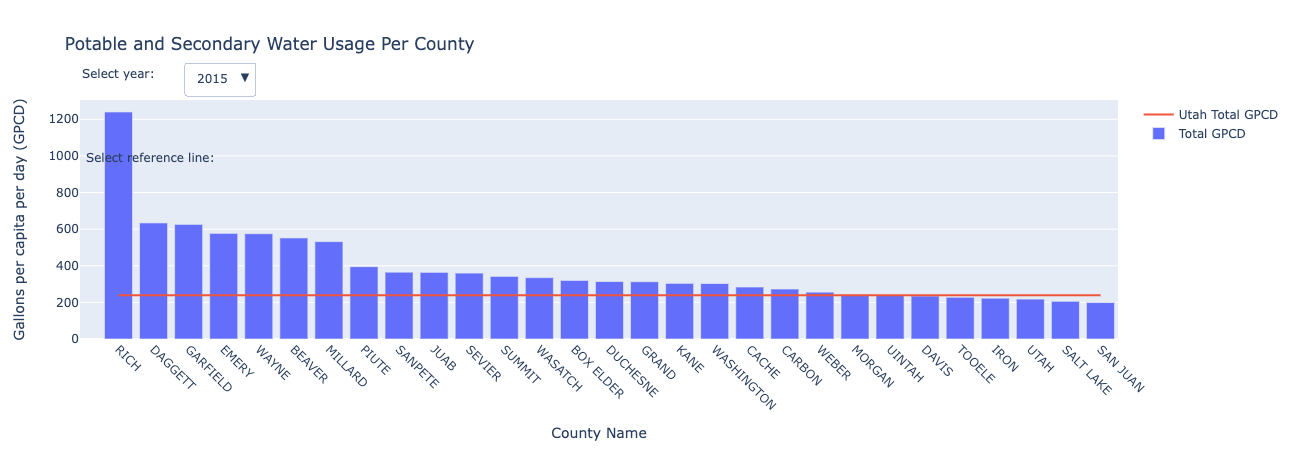

In [260]:
import plotly.graph_objects as go

x=['b', 'a', 'c', 'd']
fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['TotalGPCD'], 
    name='Total GPCD'
))

fig.add_trace(go.Scatter(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['Utah_TotalGPCD'], 
    name='Utah Total GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Potable and Secondary Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['TotalGPCD'], county_MI_2015['Utah_TotalGPCD']],
#                         'visible':[True, True]
                    }],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['TotalGPCD'], county_MI_2016['Utah_TotalGPCD']],
#                         'visible':[True, True]
                    }],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'], 'undefined'],
                        'y':[county_MI_2017['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'], 'undefined'],
                        'y':[county_MI_2018['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'], 'undefined'],
                        'y':[county_MI_2019['TotalGPCD'],'undefined'],
#                         'visible':[True, True]
                    }],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
#         dict(
#             buttons=list([
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Utah_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="State-wide",
#                     method="restyle"
#                 ),
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Mean_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="Mean",
#                     method="restyle"
#                 ),
#                 dict(
#                     args=[{
#                         'x':[county_MI_2015['NAME'], county_MI_2015['NAME']],
#                         'y':['undefined', county_MI_2015['Median_TotalGPCD']], 
# #                         'visible':[True, True]
#                     }],
#                     label="Median",
#                     method="restyle"
#                 )
#             ]),
#             direction="down",
#             pad={"r": 10, "t": 10},
#             showactive=True,
#             x=0.58,
#             xanchor="left",
#             y=1.08,
#             yanchor="top"
#         )
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(
            text="Select year:", 
            showarrow=False,
            x=0, 
            y=1.15, 
            yref="paper", 
            align="left"
        ),
        dict(
            text="Select reference line:", 
            showarrow=False,
            x=0.9, 
            y=0.8, 
            yref="paper", 
            align="left"
        )
    ]
)

fig.show()

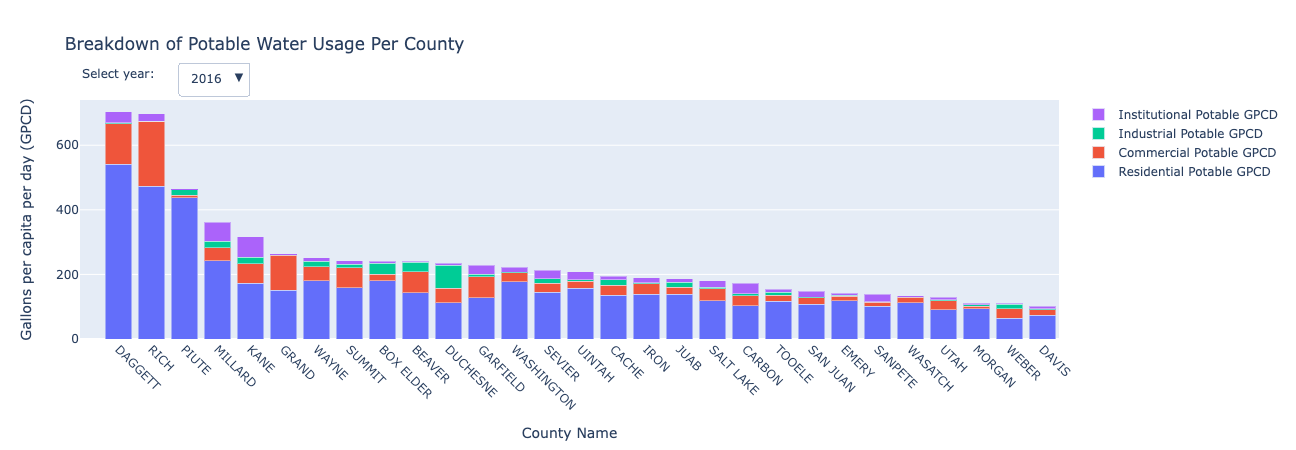

In [261]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['ResPotGPCD'], 
    name='Residential Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['ComPotGPCD'], 
    name='Commercial Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['IndPotGPCD'], 
    name='Industrial Potable GPCD'
))

fig.add_trace(go.Bar(
    x=county_MI_2015['NAME'], 
    y=county_MI_2015['InsPotGPCD'], 
    name='Institutional Potable GPCD'
))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Breakdown of Potable Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{
                        'x':[county_MI_2015['NAME'],county_MI_2015['NAME'], county_MI_2015['NAME'], county_MI_2015['NAME']],
                        'y':[county_MI_2015['ResPotGPCD'],county_MI_2015['ComPotGPCD'], county_MI_2015['IndPotGPCD'], county_MI_2015['InsPotGPCD']]}],
                    label="2015",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2016['NAME'],county_MI_2016['NAME'], county_MI_2016['NAME'], county_MI_2016['NAME']],
                        'y':[county_MI_2016['ResPotGPCD'],county_MI_2016['ComPotGPCD'], county_MI_2016['IndPotGPCD'], county_MI_2016['InsPotGPCD']]}],
                    label="2016",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2017['NAME'],county_MI_2017['NAME'], county_MI_2017['NAME'], county_MI_2017['NAME']],
                        'y':[county_MI_2017['ResPotGPCD'],county_MI_2017['ComPotGPCD'], county_MI_2017['IndPotGPCD'], county_MI_2017['InsPotGPCD']]}],
                    label="2017",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2018['NAME'],county_MI_2018['NAME'], county_MI_2018['NAME'], county_MI_2018['NAME']],
                        'y':[county_MI_2018['ResPotGPCD'],county_MI_2018['ComPotGPCD'], county_MI_2018['IndPotGPCD'], county_MI_2018['InsPotGPCD']]}],
                    label="2018",
                    method="restyle"
                ),
                dict(
                    args=[{
                        'x':[county_MI_2019['NAME'],county_MI_2019['NAME'], county_MI_2019['NAME'], county_MI_2019['NAME']],
                        'y':[county_MI_2019['ResPotGPCD'],county_MI_2019['ComPotGPCD'], county_MI_2019['IndPotGPCD'], county_MI_2019['InsPotGPCD']]}],
                    label="2019",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.2,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Select year:", showarrow=False,
        x=0, y=1.15, yref="paper", align="left")
    ]
)

fig.show()

      col_name        mean pot_or_sec  property_type
4   TotPotGPCD  160.400000    Potable          Total
5   ResPotGPCD  109.000000    Potable    Residential
6   ComPotGPCD   28.800000    Potable     Commercial
7   InsPotGPCD   15.600000    Potable  Institutional
8   IndPotGPCD    6.400000    Potable     Industrial
9   TotSecGPCD   78.200000  Secondary          Total
10  ResSecGPCD   62.000000  Secondary    Residential
11  ComSecGPCD    2.000000  Secondary     Commercial
12  InsSecGPCD   16.333333  Secondary  Institutional
13  IndSecGPCD    0.000000  Secondary     Industrial


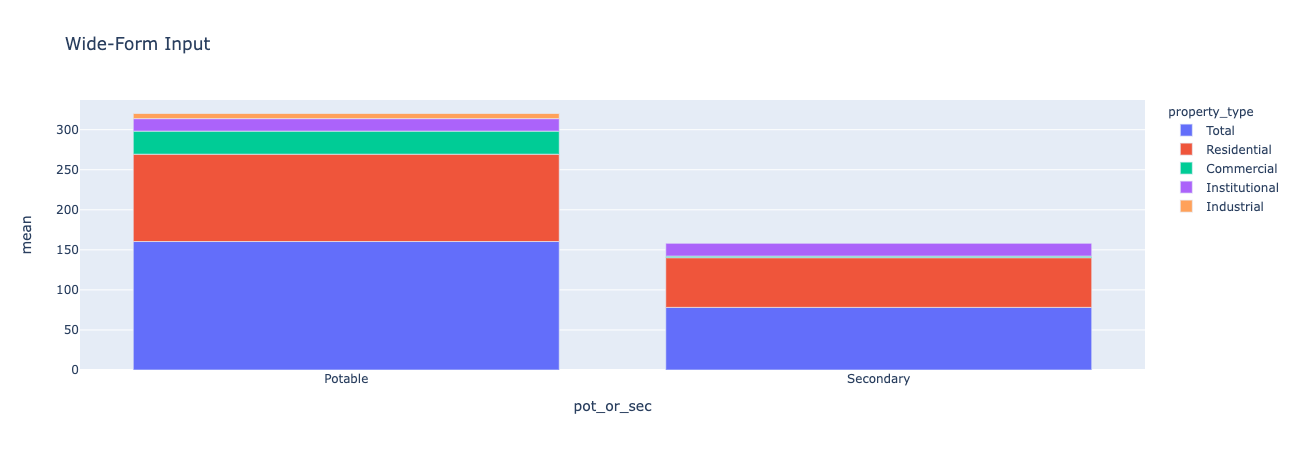

In [270]:
# AGGREGATE ACROSS ALL YEARS
# average across all 5 years
# [county_MI_2015['ResPotGPCD'],county_MI_2016['ResPotGPCD'], county_MI_2017['ResPotGPCD'], county_MI_2018['ResPotGPCD'], county_MI_2019['ResPotGPCD']]
# mean(axis=1)

df_concat = pd.concat((county_MI_2015, county_MI_2016, county_MI_2017, county_MI_2018, county_MI_2019))
by_row_index = df_concat.groupby(df_concat.NAME, as_index=False)
df_means = by_row_index.mean()
# pull county names back in to aggregated dataframe
counties_df = county_MI_2015[['NAME', 'COUNTYNBR']]
df_means = pd.merge(df_means, counties_df, how='inner', on='COUNTYNBR')
df_means = df_means.assign(color = np.where(df_means['NAME'] == 'SALT LAKE', color3, color1))

df_means

OBJECTID  COUNTYNBR  TotalGPCD  TotPotGPCD  ResPotGPCD  ComPotGPCD  \
0       12.2        1.0      687.6       234.2       147.6        48.2   
1       11.8        2.0      355.8       280.2       179.8        28.0   
2       10.8        3.0      275.4       193.4       127.6        38.0   
3       23.2        4.0      241.0       178.2       119.2        20.8   
4       21.2        5.0      591.8       488.0       361.0        92.4   
5       23.0        6.0      249.8       106.0        76.6        17.6   
6       21.8        7.0      372.6       249.8       121.0        39.8   
7       24.4        8.0      563.4       131.4       106.4        14.0   
8        7.4        9.0      631.0       292.2       154.4        87.4   
9       13.0       10.0      385.4       258.2       153.0        83.8   
10       4.8       11.0      230.4       191.0       137.6        31.0   
11      19.8       12.0      314.8       198.6       142.8        22.8   
12       2.6       13.0      328.2       236.4       147.6        35.0   
13      13.2       14.0      566.8       346.2       222.2        43.2   
14      24.4       15.0      217.8       113.6        92.8        11.2   
15      22.6       16.0      557.6       431.4       349.6        23.0   
16       9.4       17.0      984.6       854.4       604.0       219.6   
17      28.8       18.0      197.4       173.4       115.0        33.4   
18       6.8       19.0      233.8       141.8       103.4        22.6   
19       1.4       20.0      347.8       136.6        93.0        11.4   
20      24.0       21.0      512.4       219.6       141.4        29.6   
21       7.8       22.0      303.6       249.6       159.0        61.4   
22       9.4       23.0      218.0       166.2       124.6        20.6   
23      12.4       24.0      240.0       195.0       146.6        21.4   
24      16.2       25.0      219.0       129.8        88.4        25.8   
25      17.6       26.0      285.2       149.4       120.8        22.4   
26      13.6       27.0      299.0       221.2       172.0        30.0   
27      24.8       28.0      732.2       244.0       164.8        44.8   
28       6.6       29.0      262.6       109.0        68.2        24.8   

    InsPotGPCD  IndPotGPCD  TotSecGPCD  ResSecGPCD  ...  Mean_ResPotGPCD  \
0          8.8        30.0       453.6  340.333333  ...       163.462069   
1         30.0        42.2        75.6   56.666667  ...       163.462069   
2         10.4        17.2        81.8   54.666667  ...       163.462069   
3         29.6         8.6        62.8   61.666667  ...       163.462069   
4         29.2         4.8       104.0   77.333333  ...       163.462069   
5          8.2         3.6       143.8  123.333333  ...       163.462069   
6          9.0        80.0       123.0   75.000000  ...       163.462069   
7          6.6         4.2       432.0  354.666667  ...       163.462069   
8         38.6        11.4       338.8  236.666667  ...       163.462069   
9         17.4         4.0       127.4   34.666667  ...       163.462069   
10        19.0         3.6        39.2   33.666667  ...       163.462069   
11        17.6        15.2       116.4   94.000000  ...       163.462069   
12        47.4         6.6        91.6   85.333333  ...       163.462069   
13        59.8        21.4       220.4  179.333333  ...       163.462069   
14         4.8         4.8       104.2  106.666667  ...       163.462069   
15        16.2        42.4       126.2   78.666667  ...       163.462069   
16        30.8         0.0       130.2   45.000000  ...       163.462069   
17        20.4         4.6        24.0   20.000000  ...       163.462069   
18        15.2         0.8        92.2   69.000000  ...       163.462069   
19        28.2         3.8       211.0  186.000000  ...       163.462069   
20        34.8        13.8       293.0  244.000000  ...       163.462069   
21        12.8        16.4        53.8   25.000000  ...       163.462069   
22        15.2         6.0        5

In [293]:
def GPCD_breakdown_per_county_barchart(potable=True):
    col_arr = ['ResPotGPCD', 'ComPotGPCD','InsPotGPCD','IndPotGPCD'] if potable else ['ResSecGPCD', 'ComSecGPCD','InsSecGPCD','IndSecGPCD']
    mean_arr = ['Mean_ResPotGPCD', 'Mean_ComPotGPCD','Mean_InsPotGPCD','Mean_IndPotGPCD'] if potable else ['Mean_ResSecGPCD', 'Mean_ComSecGPCD','Mean_InsSecGPCD','Mean_IndSecGPCD']
    txt = 'Potable' if potable else 'Secondary'


    import plotly.graph_objects as go

    fig = go.Figure(go.Bar(
        x=df_means['NAME'], 
        y=df_means[col_arr[0]], 
        name='Residential ' + txt + ' GPCD',
        marker=dict(color = df_means['color'])
    ))

    fig.add_trace(go.Scatter(
        x=df_means['NAME'],
        y=df_means[mean_arr[0]],
        name='Mean Residential ' + txt + ' GPCD',
        marker=dict(color = df_means['color'])
    
    ))

    # Add axis labels, title, etc.
    fig.update_layout(
        barmode='stack', 
        xaxis={'categoryorder':'total descending', 'tickangle':45},
        title="Breakdown of " + txt + " Water Usage Per County",
        xaxis_title="County Name",
        yaxis_title="Gallons per capita per day (GPCD)",
    )

    # Add dropdown
    fig.update_layout(
        updatemenus=[
            dict(
                buttons=list([
                    dict(
                        args=[{
                            'x':[df_means['NAME'], df_means['NAME']],
                            'y':[df_means[col_arr[0]], df_means[mean_arr[0]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Residential " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME'], df_means['NAME']],
                            'y':[df_means[col_arr[1]], df_means[mean_arr[1]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Commercial " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME'], df_means['NAME']],
                            'y':[df_means[col_arr[2]], df_means[mean_arr[2]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Institutional " + txt + " GPCD",
                        method="restyle"
                    ),
                    dict(
                        args=[{
                            'x':[df_means['NAME'], df_means['NAME']],
                            'y':[df_means[col_arr[3]], df_means[mean_arr[3]]],
                            'marker':dict(color = df_means['color'])
                        }],
                        label="Industrial " + txt + " GPCD",
                        method="restyle"
                    ),
                ]),
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.2,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
    fig.update_layout(
        annotations=[
            dict(text="Select year:", showarrow=False,
            x=0, y=1.15, yref="paper", align="left")
        ]
    )

    return fig.show()

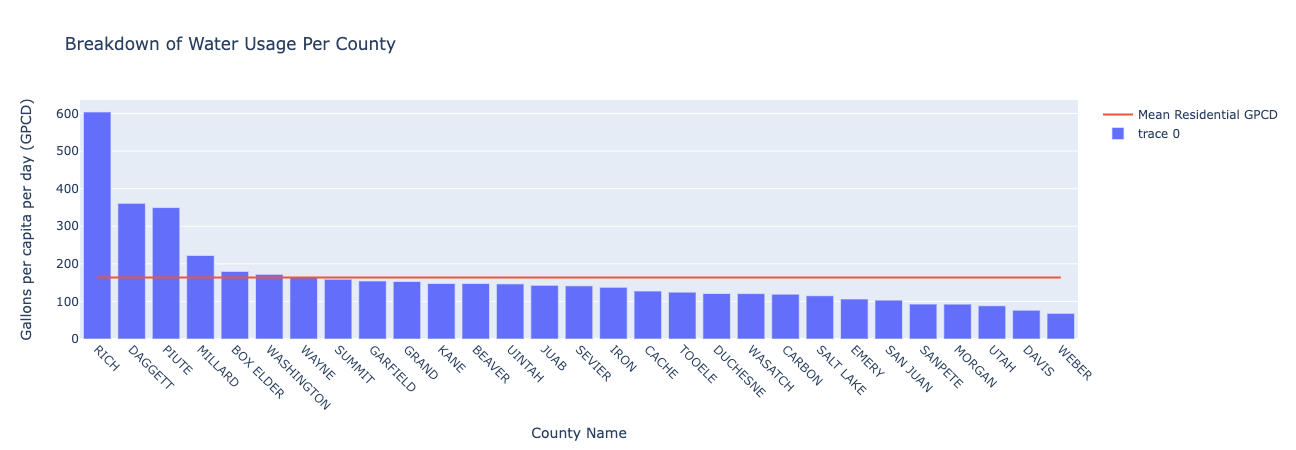

In [290]:
fig = go.Figure(go.Bar(
    x=df_means['NAME'],
    y=df_means['ResPotGPCD']
))

fig.add_trace(go.Scatter(
    x=df_means['NAME'],
    y=df_means['Mean_ResPotGPCD'],
    name='Mean Residential GPCD',
    marker=dict(color = df_means['color'])

))

# Add axis labels, title, etc.
fig.update_layout(
    barmode='stack', 
    xaxis={'categoryorder':'total descending', 'tickangle':45},
    title="Breakdown of Water Usage Per County",
    xaxis_title="County Name",
    yaxis_title="Gallons per capita per day (GPCD)",
)
    
fig.show()

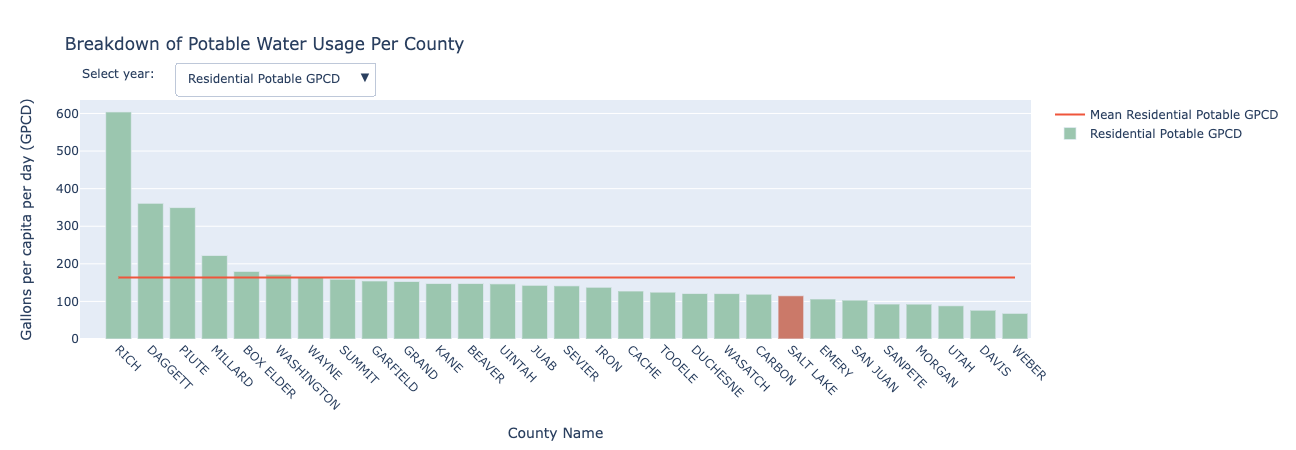

In [294]:
GPCD_breakdown_per_county_barchart(True)

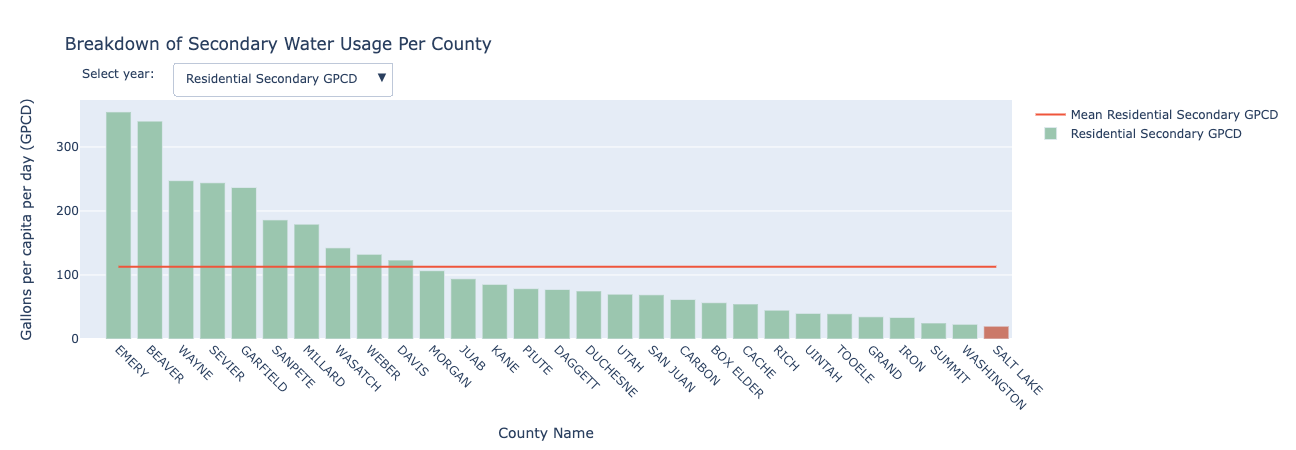

In [295]:
GPCD_breakdown_per_county_barchart(False)

In [ ]:
df_means

In [ ]:
avg_potable = pd.DataFrame(df_means['NAME'], )
avg_potable

In [ ]:
county_MI_2015[['NAME','Year','TotPotGPCD','ResPotGPCD','TotPotaUse','ResPotaUse', 'SHAPE_Area']][county_MI_2015['NAME'] == 'BEAVER']

In [ ]:
# 232*365*6754.89343029225 #84680 gallons per person
# # 1 acre-foot = 325851 gallons
# # gallons/capita/day/1
# # gallons/(capita*day)
# # x/(6755*365) = 232
# 232*(6755*365) #572013400 gallons

# # 1 ac-ft = 325851 gallons
# # x ac-ft = 572013400 gallons
# 572013400 / 325851 #= ac-ft
# 1755.4446664272934 ac-ft (should equate to use) 

# convert Usage in acre-feet to gallons per capita per day




### Importing Population Estimate Data

2018 and 2019 are missing secondary use in GPCD data broken down by type, so I needed to convert the raw use column (in acre-feet per year) to GPCD, based on the population. I started by importing the population census data and cleaned it up. 

First, based on the formatting of the table when converted to csv, I removed the first few and last few rows, and changed the header row. 

Second, when you import the data, values are read as strings with commas, so I needed to first remove the comma and convert from a string to integer. 

Third, I updated the County column to match the county column from the county water usage dataframes, and merged based on the year corresponding to the water usage data.

Population data can be found here:
https://gardner.utah.edu/demographics/state-and-county-level-population-estimates/

In [ ]:
# Import csv data
pop_df = pd.read_csv('./data/UPC-Compiled-Intercensals-2010_2019/Population Estimate-Table 1.csv')

# Change header row
pop_df.columns = pop_df.iloc[3]

# Remove unneccessary rows
pop_df = pop_df.drop(pop_df.index[0:4]).drop(pop_df.index[34:37])

# Remove commas and convert string to integer
pop_df[list(pop_df.columns[3:])] = pop_df[list(pop_df.columns[3:])].replace(',','', regex=True).astype(float).astype(int)

# In order to merge population data with other data, need to clean county column to match
pop_df['County'] = pop_df['County'].replace(' County', '', regex=True).str.upper()
pop_df

# Let's also remove the Variable, Series, and 2010-2014 columns, since none of that is relevant for our analysis
pop_df = pop_df.drop(list(pop_df.columns[1:9]), axis=1)


# Add population for each county to county datasets
pop_df = pop_df.rename(columns={'County': 'NAME'})

def merge_pop_usage_data(df):
    
    year = str(df['Year'].unique()[0])
    df = pd.merge(df, pop_df[['NAME',year]], how="left", on=["NAME"]).rename(columns={year:'Pop_Est'})
    return df

county_MI_2015 = merge_pop_usage_data(county_MI_2015)
county_MI_2016 = merge_pop_usage_data(county_MI_2016)
county_MI_2017 = merge_pop_usage_data(county_MI_2017)
county_MI_2018 = merge_pop_usage_data(county_MI_2018)
county_MI_2019 = merge_pop_usage_data(county_MI_2019)

In [ ]:
county_MI_2015[['NAME','Year','TotPotGPCD','ResPotGPCD','TotPotaUse','ResPotaUse', 'Pop_Est']][county_MI_2015['NAME'] == 'BEAVER']

In [ ]:
calc_use_acre_ft(119, pop=1106942)

In [ ]:
((224428.10741719374 - 226224.37) / 226224.37)*100

### Estimating Missing Secondary GPCD Water Use Per County for 2018 and 2019

For some reason, GPCD secondary water usage per type is missing for year 2018 and 2019, but can be estimated based on the secondary use columns, which provide water usage in acre-feet. First, I import the population estimate data per county per year, and use that data to convert the usage in acre-feet columns to an approximate corresponding GPCD, and verify a match with the potable columns, which have columns in both acre-feet and GPCD. 

In [ ]:
def calc_use_acre_ft(use_GPCD, pop):
    use_gal = use_GPCD * (pop*365) 
    use_acft = use_gal / 325851 #conversion factor from gal to ac-ft
    
    return use_acft #should match use column

def calc_use_gpcd(use_acft, pop):
    use_gal = use_acft * 325851
    use_GPCD = use_gal / (pop*365)
    
    return use_GPCD
county_MI_2018.columns
# county_MI_2018['ResSecGPCD'] = calc_use_gpcd(county_MI_2018['ResSecoUse'], county_MI_2018['Pop_Est'])

In [ ]:
use_GPCD = 181
use_acft = 226224.37
pop = 1106942

conv_fact = (use_GPCD / use_acft ) * (pop*365)
conv_fact